In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import *

# Let's convert video frames to images

In [4]:
# video_read_path = '/home/ibm-work/data/ute/P01.mp4'
# img_save_path = '/home/ibm-work/data/ute/P01_frames'
# every_frame = 1000
# convert_video2imgs(video_read_path, every_frame, img_save_path)

# Now we examine frames

In [5]:
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt

from transformers import CLIPProcessor, CLIPModel
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

import clip
import torch

In [6]:
# Intialize CLIP model
clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

2023-08-17 18:29:33.760641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
clipseg_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
clipseg = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [8]:
import utils

(480, 320)


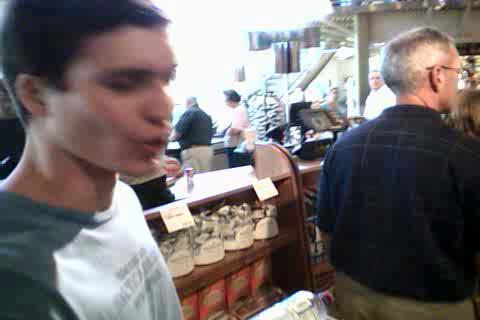

(480, 320)


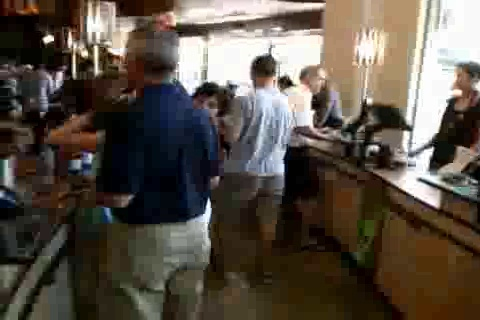

(480, 320)


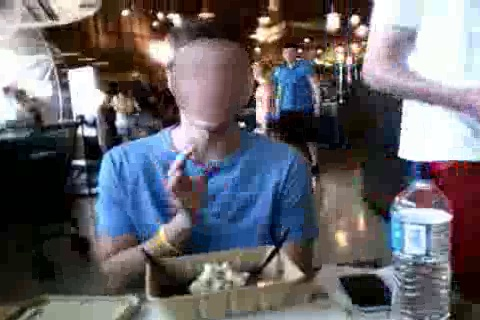

(480, 320)


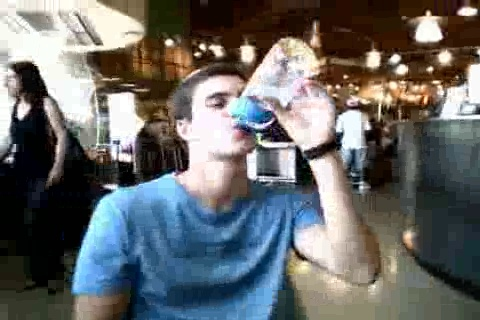

(480, 320)


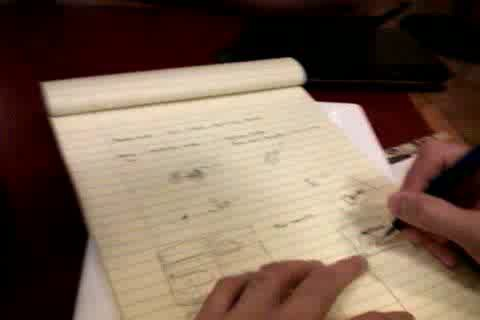

(480, 320)


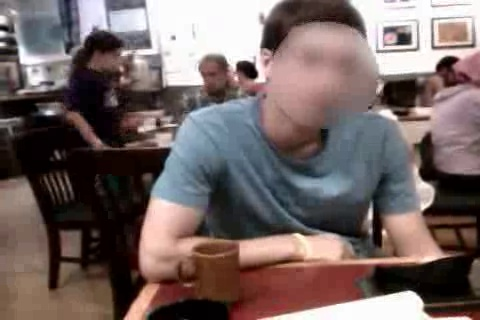

In [9]:
img_path1 = "/home/ibm-work/data/ute/P01_frames/frame0.jpg"
img_path2 = "/home/ibm-work/data/ute/P01_frames/frame1000.jpg"
img_path3 = "/home/ibm-work/data/ute/P01_frames/frame14000.jpg"
img_path4 = "/home/ibm-work/data/ute/P01_frames/frame30000.jpg"
img_path5 = "/home/ibm-work/data/ute/P01_frames/frame80000.jpg"
img_path6 = "/home/ibm-work/data/ute/P01_frames/frame90000.jpg"
img_list = [img_path1, img_path2, img_path3, img_path4, img_path5, img_path6]

for im in img_list:
    image = Image.open(im)
    print(image.size)
    image.show()

In [10]:
vocab = ["coffee mug", "person", "human", "dog", "bottle", "knife"]
# vocab = ["pole", "coffee mug", "dog", "window", "person", "telephone booth", "road", "sign", "cat", "car", "lamp", "tree"]
# vocab = utils.deserialize("/home/ibm-work/data/coco_objects/coco_labs.obj") + vocab

# Try SM and heuristics to generate hypotheses

Overwriting to CPU run on SM inference...


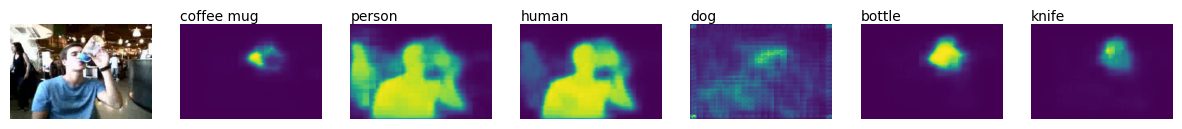

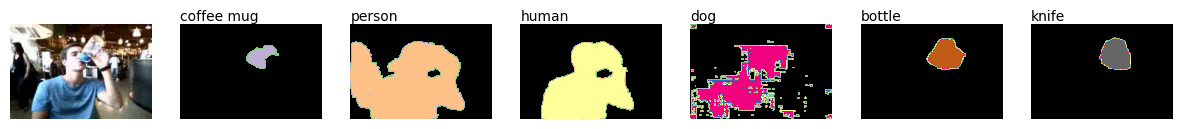

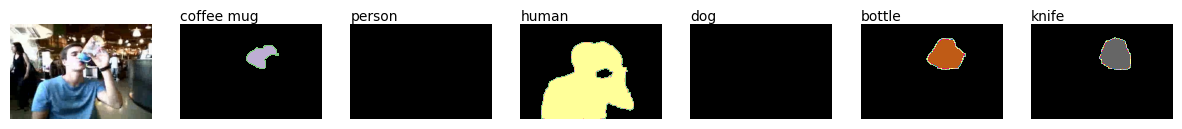

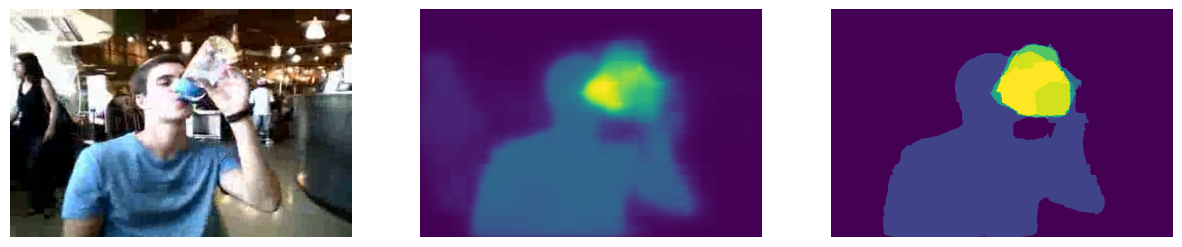

In [11]:
from vlm_sm_inference import hyfive

image = Image.open(img_path4)
hyfive(clipseg, clipseg_processor, clip, clip_processor, image, vocab)

Overwriting to CPU run on SM inference...


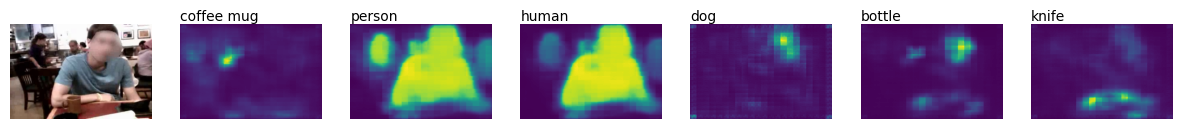

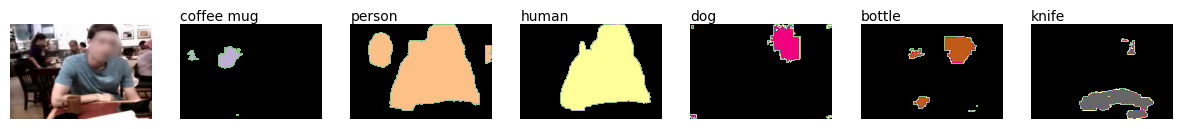

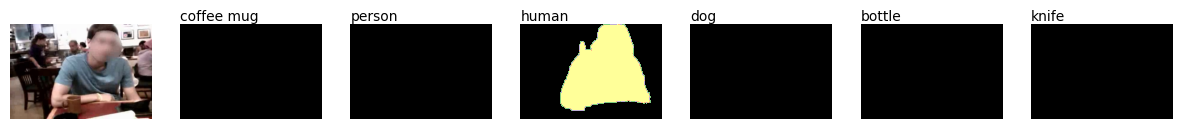

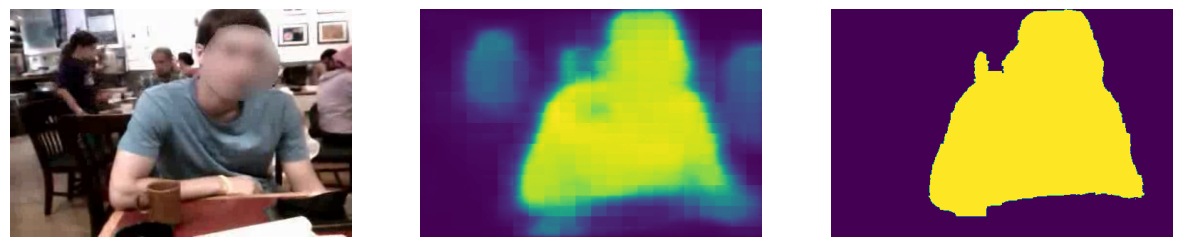

In [19]:
image = Image.open(img_path6)
hyfive(clipseg, clipseg_processor, clip, clip_processor, image, vocab)

# Try full SM-VLM-SM pipeline